##### Author: Muhammad Hassaan
##### Date: July 31, 2024
##### Email: muhammadhassaan7896@gmail.com

---

# **Best Model Selection for Diamond Datasets**

---

## **1. Introduction**

- **Objective:** Identify the best regressor and classifier for the diamonds dataset using a variety of models and their hyperparameters. 
- **Dataset:** Diamond Dataset from Seaborn Library 
- **Sample Size:** 10,000 samples 

## **2. Algorithms**
I will evaluate the following machine-learning algorithims:
- **Classification:**
    - Logistic Regression 
    - Support Vector Classifier 
    - Decision Tree Classifier 
    - Random Forest Classifier 
    - Gradient Boosting Classifier 
    - Adaboost Classifier 
    - K-Nearst Neighbors Classifier 
    - XGBoost Classifier 
    - Catboost Classifier 
    - LightGBM Classifier 
    - GuassionNB Classifier 
    - BernoulliNB Classifier 

- **Regression:**
    - Linear Regression 
    - Support Vector Regressor 
    - Decision Tre Regressor
    - Random Forest Regressor 
    - Gradient Boosting Regressor 
    - Adaboost Regressor 
    - K-Nearest Neighbors Regressor 
    - XGBoost Regressor 
    - Catboost Regressor  
    - LightGBM CRegressor  
    - GuassionNB Regressor 
    - BernoulliNB Regressor 


---

## **Overview of the Diamonds Dataset**

The diamonds dataset is a well-known dataset in the field of data science and machine learning, commonly used for demonstrating regression and classification techniques. It contains various attributes of diamonds, which can be used to predict the price or classify the quality of diamonds based on certain features.

## **Features in the Diamonds Dataset**

### **Carat**

- **Description**: The weight of the diamond.
- **Type**: Numeric (float).
- **Usage**: This is one of the most important features when predicting the price of a diamond. Heavier diamonds tend to be more expensive.

### **Cut**

- **Description**: The quality of the cut of the diamond.
- **Type**: Categorical (ordinal).
- **Categories**: 'Fair', 'Good', 'Very Good', 'Premium', 'Ideal'.
- **Usage**: The cut quality affects the brilliance of the diamond, influencing its price. This feature is often converted to numerical values for machine learning models.

### **Color**

- **Description**: The color of the diamond.
- **Type**: Categorical (ordinal).
- **Categories**: 'D' (best) to 'J' (worst).
- **Usage**: Color grading impacts the diamond's price. Similar to the cut, this feature is typically encoded numerically.

### **Clarity**

- **Description**: The clarity of the diamond, indicating the presence of inclusions or blemishes.
- **Type**: Categorical (ordinal).
- **Categories**: 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'.
- **Usage**: Clarity is another critical factor in determining the price. Higher clarity usually means a higher price.

### **Depth**

- **Description**: The total depth percentage of the diamond (z / mean(x, y)).
- **Type**: Numeric (float).
- **Usage**: The depth affects the diamond's brilliance and, consequently, its price.

### **Table**

- **Description**: The width of the diamond's top relative to its widest point.
- **Type**: Numeric (float).
- **Usage**: This feature influences the diamond's appearance and price.

### **Price**

- **Description**: The price of the diamond in US dollars.
- **Type**: Numeric (integer).
- **Usage**: This is the target variable for regression tasks, where we aim to predict the price based on the other features.

### **X**

- **Description**: Length of the diamond in mm.
- **Type**: Numeric (float).
- **Usage**: These dimensions help in understanding the size of the diamond, affecting its price.

### **Y**

- **Description**: Width of the diamond in mm.
- **Type**: Numeric (float).
- **Usage**: Similar to the length, the width also impacts the diamond's value.

### **Z**

- **Description**: Depth of the diamond in mm.
- **Type**: Numeric (float).
- **Usage**: The depth measurement is used in conjunction with the other dimensions to understand the diamond's size and shape, influencing its price.

---

## Data Loading and Preprocessing

### Load Dataset
Load the diamonds dataset from Seaborn.

### Sample Dataset
Take a sample of 10,000 entries from the dataset.

### Data Exploration
Perform basic exploratory data analysis (EDA) to understand the dataset.

### Data Cleaning
Handle missing values, if any.

### Feature Engineering
Convert categorical features to numerical using techniques like one-hot encoding.

---

# **Let's get started!**

---

#### **Import Libraries**

In [28]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, auc, precision_score, recall_score, f1_score
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import pickle 

# import warnings 
import warnings
warnings.filterwarnings("ignore")

### **Load Dataset**

In [29]:
# load diamond dataset with sampling 10k random records
df = sns.load_dataset('diamonds').sample(n=10000, random_state=42)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


### **Data Preprocessing**

In [30]:
# shape of the data 
df.shape 

(10000, 10)

In [31]:
# data structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1388 to 42497
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    10000 non-null  float64 
 1   cut      10000 non-null  category
 2   color    10000 non-null  category
 3   clarity  10000 non-null  category
 4   depth    10000 non-null  float64 
 5   table    10000 non-null  float64 
 6   price    10000 non-null  int64   
 7   x        10000 non-null  float64 
 8   y        10000 non-null  float64 
 9   z        10000 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 655.2 KB


In [32]:
# data summary 
df.describe()

,carat,depth,table,price,x,y,z
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.795464,61.77341,57.447340,3900.356600,5.722033,5.723494,3.534455
std,0.476937,1.45393,2.255054,3992.251932,1.128186,1.120839,0.696424
min,0.200000,43.00000,49.000000,335.000000,0.000000,0.000000,0.000000
25%,0.400000,61.10000,56.000000,929.750000,4.690000,4.700000,2.900000
50%,0.700000,61.90000,57.000000,2385.500000,5.690000,5.700000,3.520000
75%,1.040000,62.50000,59.000000,5235.250000,6.530000,6.530000,4.030000
max,4.010000,79.00000,73.000000,18823.000000,10.140000,10.100000,6.310000


In [33]:
# function for neat display 
def display_all(title):
    print('-'*50)
    print(title.upper())
    print('-'*50)

In [34]:
# function to print the summary of the dataframe column type 
def summary(df):
    # count the number of categorical columns 
    categorical = df.select_dtypes(include=['category']).shape[1]
    print('• Categorical columns: ', categorical)
    # count the number of float columns 
    float = df.select_dtypes(include=['float64']).shape[1]
    print('• Numerical columns: ', float)
    # count the number of integer columns
    int = df.select_dtypes(include=['int64']).shape[1]
    print('• Integer columns: ', int)

display_all('Data Summary')
summary(df)

--------------------------------------------------
DATA SUMMARY
--------------------------------------------------
• Categorical columns:  3
• Numerical columns:  6
• Integer columns:  1


### **Daimond Dataset Features** 

In [35]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [36]:
# summary statistics 
df.describe()

,carat,depth,table,price,x,y,z
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.795464,61.77341,57.447340,3900.356600,5.722033,5.723494,3.534455
std,0.476937,1.45393,2.255054,3992.251932,1.128186,1.120839,0.696424
min,0.200000,43.00000,49.000000,335.000000,0.000000,0.000000,0.000000
25%,0.400000,61.10000,56.000000,929.750000,4.690000,4.700000,2.900000
50%,0.700000,61.90000,57.000000,2385.500000,5.690000,5.700000,3.520000
75%,1.040000,62.50000,59.000000,5235.250000,6.530000,6.530000,4.030000
max,4.010000,79.00000,73.000000,18823.000000,10.140000,10.100000,6.310000


In [37]:
# Observation Statistics
stats = df.describe()

# display a heading for the summary statistics 
display_all('Summary Statistics')

# display the summary statistics
print(f"""
1. The dataset consists of {int(stats.loc['count', 'carat'])} diamond records.
2. Diamond carat weights range from {stats.loc['min', 'carat']} to {stats.loc['max', 'carat']}, with an average of {stats.loc['mean', 'carat']:.2f}.
3. The mean depth percentage is {stats.loc['mean', 'depth']:.2f}%, with a standard deviation of {stats.loc['std', 'depth']:.2f}%.
4. The average table size is {stats.loc['mean', 'table']:.2f}%, varying typically by {stats.loc['std', 'table']:.2f}%.
5. Prices vary widely, from ${stats.loc['min', 'price']:.2f} to ${stats.loc['max', 'price']:.2f}, indicating significant diversity in diamond quality and size.
6. The mean dimensions (length x width x depth) in millimeters are approximately ({stats.loc['mean', 'x']:.2f} x {stats.loc['mean', 'y']:.2f} x {stats.loc['mean', 'z']:.2f}).
7. The standard deviation in the lengths and widths suggests some variation in diamond shapes and cuts.
8. The 50th percentile (median) values are generally close to the mean, suggesting a relatively symmetrical distribution for carat, depth, and table.
""")

print('-'*50)

--------------------------------------------------
SUMMARY STATISTICS
--------------------------------------------------

1. The dataset consists of 10000 diamond records.
2. Diamond carat weights range from 0.2 to 4.01, with an average of 0.80.
3. The mean depth percentage is 61.77%, with a standard deviation of 1.45%.
4. The average table size is 57.45%, varying typically by 2.26%.
5. Prices vary widely, from $335.00 to $18823.00, indicating significant diversity in diamond quality and size.
6. The mean dimensions (length x width x depth) in millimeters are approximately (5.72 x 5.72 x 3.53).
7. The standard deviation in the lengths and widths suggests some variation in diamond shapes and cuts.
8. The 50th percentile (median) values are generally close to the mean, suggesting a relatively symmetrical distribution for carat, depth, and table.

--------------------------------------------------


### **Correlation matrix**

In [38]:
# define a function to encode categorical columns using LabelEncoder
def encode_col(df, cols):
    le = LabelEncoder()

    # loop through each column
    for col in cols:
        df[col] = le.fit_transform(df[col])

    # return the encoded dataframe
    return df

--------------------------------------------------
CORRELATION MATRIX
--------------------------------------------------


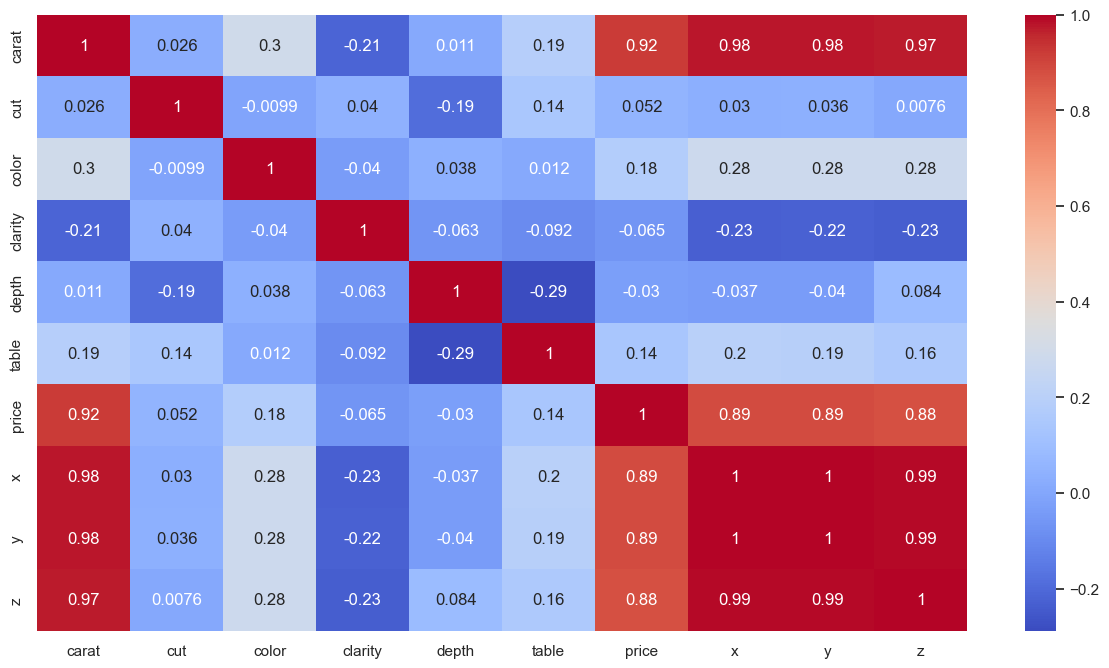

In [39]:
# plotting correlation matrix 

# copy the dataset to a new dataframe for plotting correlation matrix 
df_corr = df.copy()

# create a list of categorical variables by checking the data type 
cat_cols = df_corr.select_dtypes(include=['object', 'category']).columns.tolist()

# use label encoder to ordinal features 
le = LabelEncoder()
df_corr = encode_col(df_corr, cat_cols)

# plot correlation matrix to see the correlation between the variables 
display_all("Correlation Matrix")
corr = df_corr.corr()

# plot the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### **Missing Values Inspection**

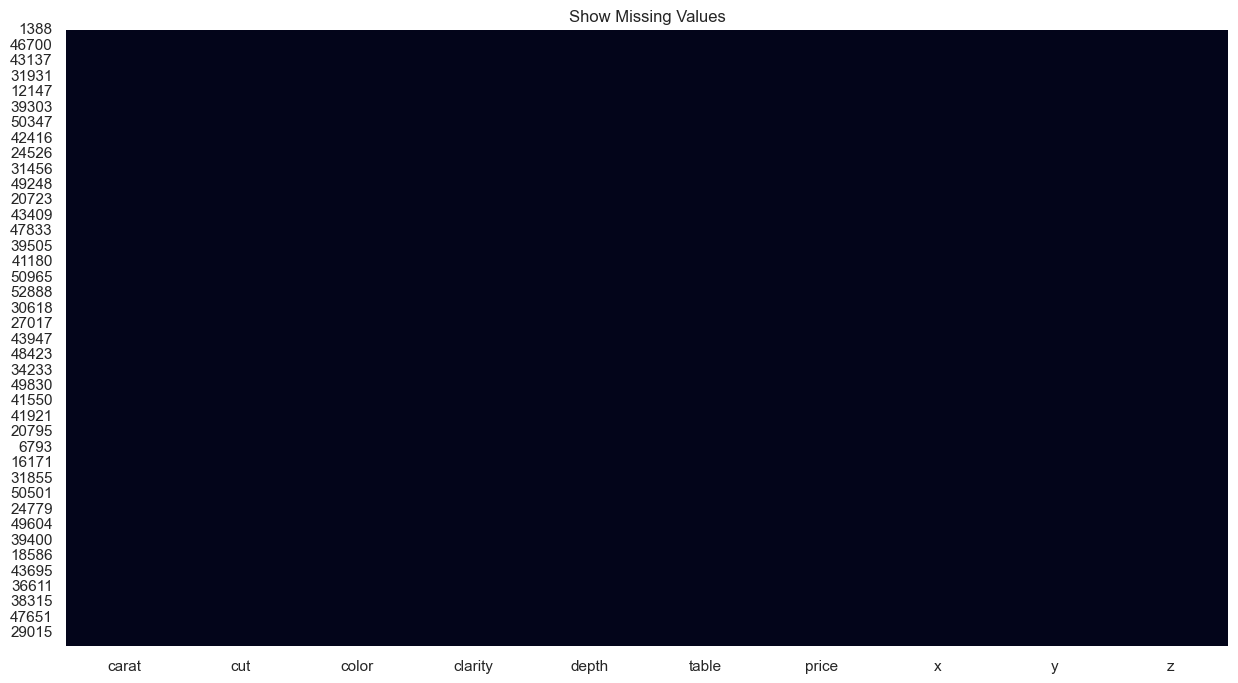

In [40]:
# plotting heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Show Missing Values")
plt.show()

### **Observation - Completeness of the Diamond Dataset**
The diamond dataset is fully populated, with no missing values present across all features, ensuring robustness for statistical analysis and machine learning modeling.

In [41]:
# check skewness 
# get the numerical columns 
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# calculate the skewness for each column 
skew = df[num_cols].skew()

# create a dataframe with skewness values as a single row 
skew_df = pd.DataFrame([skew], index=['Skewness'])

# print the skewness of a dataframe 
display_all('Data Distribution - Skewness')
round(skew_df, 3)

--------------------------------------------------
DATA DISTRIBUTION - SKEWNESS
--------------------------------------------------


,carat,depth,table,price,x,y,z
Skewness,1.143,-0.073,0.771,1.653,0.398,0.393,0.39


## **Plotting Distribution**

In [42]:
# plotting the histogram and boxplot to check the data distribution for the numerical columns 
def plot_histogram_and_boxplot(df, num_cols, palette = ['#FF5733']):
    # set to 'dark' for a black background 
    sns.set(style='dark', palette='deep')

    # set the figure size
    plt.figure(figsize=(15, len(num_cols) * 5))

    for i, col in enumerate(num_cols):
        # Histogram (left)
        ax1 = plt.subplot(len(num_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True, bins=30, color=palette[0])
        plt.title(f'Histogram of {col}', color='white')
        plt.xlabel(col, color='white')
        plt.ylabel('Count', color='white')
        ax1.set_facecolor('#1C1C1C')
        ax1.spines['bottom'].set_color('white')
        ax1.spines['top'].set_color('white') 
        ax1.spines['right'].set_color('white')
        ax1.spines['left'].set_color('white')
        ax1.tick_params(axis='x', colors='white')
        ax1.tick_params(axis='y', colors='white')

        # Boxplot (right)
        ax2 = plt.subplot(len(num_cols), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=palette[0], linewidth=2.5,
                    flierprops=dict(markerfacecolor='white', marker='o', markeredgecolor='white', markersize=5),
                    whiskerprops=dict(color='white', linewidth=2.5),
                    capprops=dict(color='white', linewidth=2.5),
                    boxprops=dict(edgecolor='white', linewidth=2.5))
        plt.title(f'Boxplot of {col}', color='white')
        ax2.set_facecolor('#1C1C1C')
        ax2.spines['bottom'].set_color('white')
        ax2.spines['top'].set_color('white') 
        ax2.spines['right'].set_color('white')
        ax2.spines['left'].set_color('white')
        ax2.tick_params(axis='x', colors='white')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()

--------------------------------------------------
HISTOGRAM AND BOXPLOT
--------------------------------------------------


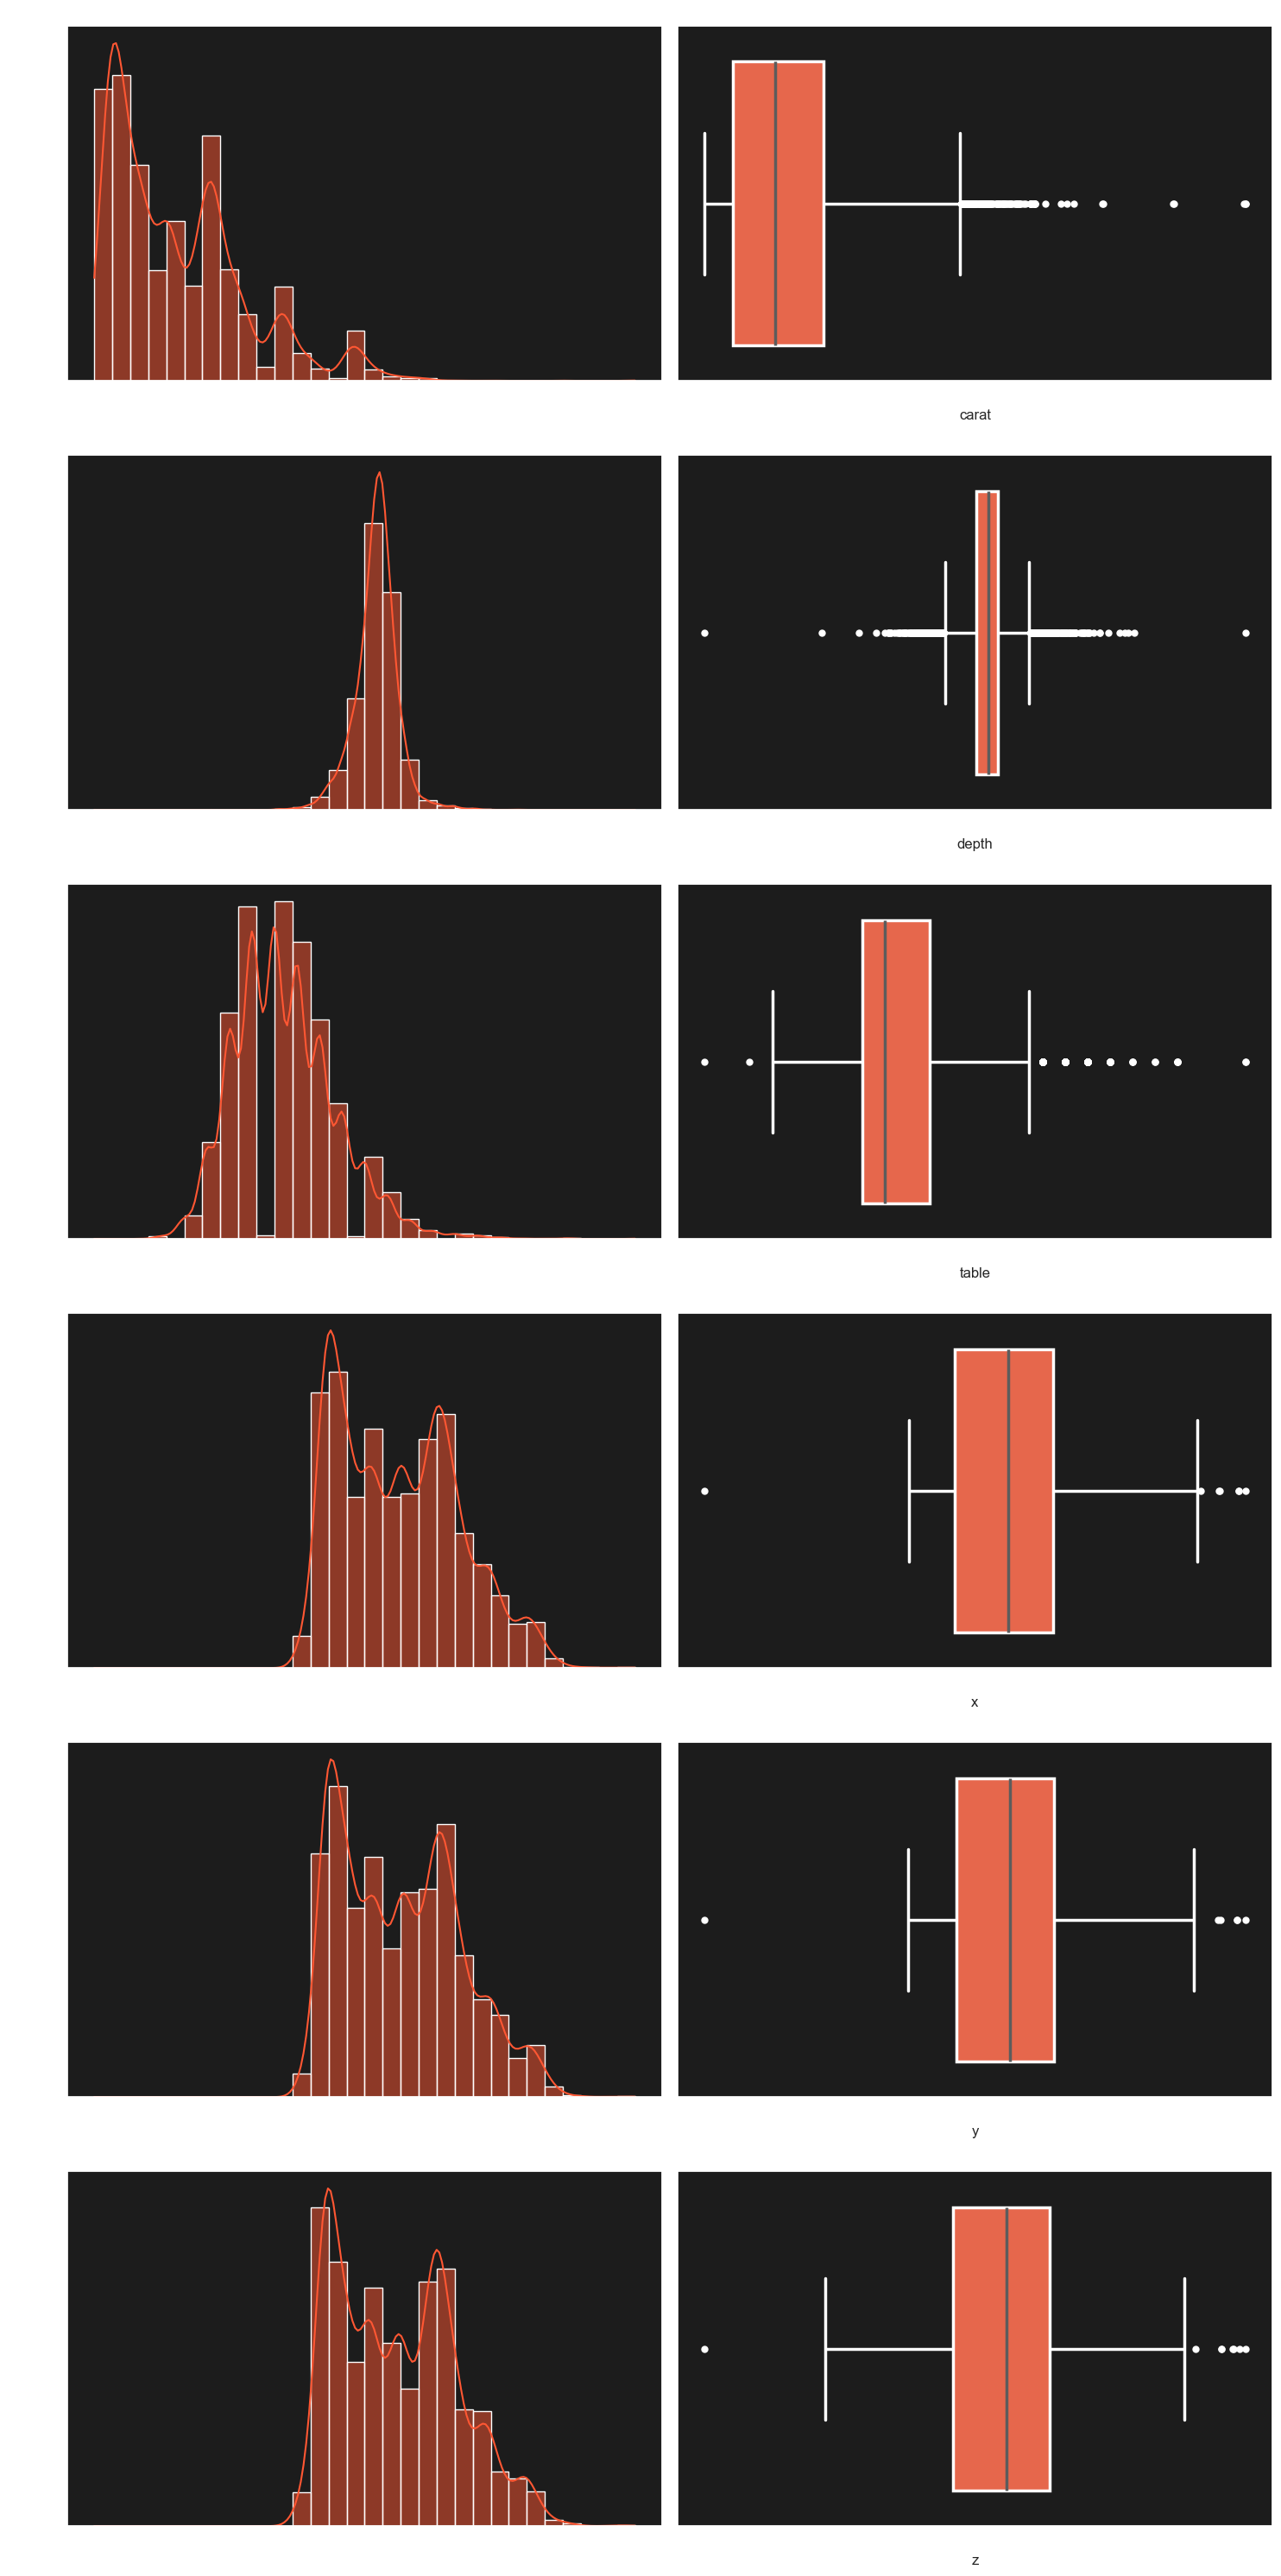

In [43]:
# call the function 
display_all("Histogram and Boxplot")
plot_histogram_and_boxplot(df, df[df.columns.difference(['price'])].select_dtypes(include=np.number).columns.tolist())

### Observations Regarding the Normal Distribution of the Numerical Features

#### **Carat**
- **Distribution:** Exhibits a positively skewed distribution (skew = 1.143), indicating a longer tail on the right side with a mean of 0.795.
- **Concentration:** The majority of diamond carat values are lower than the mean, suggesting a concentration of smaller-sized diamonds in the dataset.

#### **Depth**
- **Distribution:** Shows a nearly symmetric distribution (skew = -0.073) around the mean of 61.77.
- **Tightness:** The distribution is relatively tight around the mean, as indicated by the low standard deviation of 1.454.

#### **Table**
- **Distribution:** Has a positive skew (skew = 0.771), indicating a longer tail towards the higher values.
- **Mean:** The mean table size is 57.45, with most data points falling close to this value.

#### **Price**
- **Distribution:** Displays a highly positively skewed distribution (skew = 1.653), with most diamonds priced lower than the mean of 3900.36.
- **Rarity:** This suggests that higher-priced diamonds are rarer and deviate significantly from the average diamond price in the dataset.

#### **X_length**
- **Distribution:** The distribution has a slight positive skew (skew = 0.398), with a mean length of 5.72.
- **Symmetry:** A skewness closer to zero indicates that the length of diamonds is somewhat symmetrically distributed.

#### **Y_width and Z_depth**
- **Distribution:** Both have a slight positive skew (skew = 0.393 and 0.390, respectively), with means very close to that of X_length.
- **Pattern:** This slight skewness indicates that while there are outliers, the width and depth measurements tend to be fairly normally distributed around their means.

## **Regression Model Evaluation Process - My Strategy.**

- Setup: Initialize a suite of regression models along with their hyperparameters.
- Scaling: Apply QuantileTransformer to normalize data features.
- Optimization: Employ GridSearchCV for hyperparameter tuning within cross-validation.
- Metrics: Compute MAPE, MAE, and R2 to assess model performance.
- Selection: Sort models by name, select the best model based on R2 score.
- Store Model: Store model in file.
- Predictions: Use dummy data and apply prediction.

In [44]:
# Dictionary of regression models with their respective hyperparameters for grid search
models = {
    'Linear Regression': {
      'model': LinearRegression(),
      'params': {},
      },
    'Support Vector Regression': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          
        },
    },
    'Decision Tree Regression': {
        'model': DecisionTreeRegressor(),
        'params': {
            'model__splitter': ['best', 'random'],
            'model__max_depth': [None, 1, 2, 3],
        },
    },
    'Random Forest Regression': {
        'model': RandomForestRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3], 
        },
    },
    'Gradient Boosting Regression': {
        'model': GradientBoostingRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3], 
        },
    },
    'AdaBoost Regression': {
        'model': AdaBoostRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
        },
    },
    'KNN Regression': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5],
        },
    },
    'XGBoost Regression': {
        'model': XGBRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3], 
        },
    },
    'LightGBM Regression': {
        'model': LGBMRegressor(),
        'params': {
            'model__n_estimators': [10],
            'model__max_depth': [None, 1, 2, 3], 
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1],
        },
    },
    'GaussianNB Regression': {
        'model': GaussianNB(),
        'params': {},
    },
    # 'MultinomialNB Regression': {
    #     'model': MultinomialNB(),
    #     'params': {},
    # },
    'BernoulliNB Regression': {
        'model': BernoulliNB(),
        'params': {},
    },
}

In [45]:
# data prepration for regression analysis 

num_cols = df.select_dtypes(include=['number']).columns.tolist()

X = df.drop('price', axis=1)
y = df['price']

# encoding categorical columns
X = encode_col(X, cat_cols)

# train test split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [46]:
%%time 
# initailze the list to store model performance metrics 
model_scores = []

# start with worse possible r2_score 
best_r2_score = -float('inf')
best_regressor = None

# iterate over the configured model 
for name, model in models.items():

    # set up a pipeline with data scaling and current model 
    pipeline = Pipeline([
        ('scaler', QuantileTransformer(random_state=42, output_distribution='normal')),
        ('model', model['model'])
    ])

    # create a grid search cv object to tune model hyperparameters
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model['params'],
        cv=5,
        scoring='neg_root_mean_squared_error',
        verbose=0,
        n_jobs=-1
    )

    # fit the grid search object
    grid_search.fit(X_train, y_train)

    # predict on the test set using the best found model 
    y_pred = grid_search.predict(X_test)

    # calculate r2_score
    r2 = r2_score(y_test, y_pred)

    # append porfarmance metrics for the current model to the list 
    model_scores.append({
        'model': name,
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2,
    })

    # Initialize variables to keep track of the best regression model
    # Check if this model has the best R2 score so far
    if r2 > best_r2_score:
        best_r2_score = r2
        best_regressor = grid_search.best_estimator_

# sorted the models basedon the model name (alphabetically)
sorted_models = sorted(model_scores, key=lambda x:x['model'], reverse=False)

# Convert the sorted model performance list to a DataFrame for display
metrics = pd.DataFrame(sorted_models)
# Identify the best performing model based on the R2 score
best_reg_model = max(sorted_models, key=lambda x: x['R2'])

# Use a custom function 'heading' to display the heading (not defined in this snippet)
display_all("Regression Models Performance")
# Display the metrics DataFrame with rounded values for readability
metrics.round(2)

--------------------------------------------------
REGRESSION MODELS PERFORMANCE
--------------------------------------------------
CPU times: total: 18.3 s
Wall time: 3min 59s


,model,MAPE,MAE,R2
0,AdaBoost Regression,0.24,814.21,0.89
1,BernoulliNB Regression,0.38,1795.87,0.32
2,Decision Tree Regression,0.10,414.25,0.96
3,GaussianNB Regression,0.23,973.56,0.76
4,Gradient Boosting Regression,0.11,379.39,0.97
5,KNN Regression,0.16,588.52,0.93
6,LightGBM Regression,0.14,384.10,0.97
7,Linear Regression,0.97,1584.05,0.73
8,Random Forest Regression,0.08,318.23,0.98
9,Support Vector Regression,0.69,1435.74,0.66


In [47]:
# Print the best model's performance metrics
display_all("BEST REGRESSION MODEL PERFORMANCE")

print(f"model: {best_reg_model['model']}")
print(f"MAPE: {best_reg_model['MAPE']:.2f}")
print(f"MAE: {best_reg_model['MAE']:.2f}")
print(f"R2 Score: {best_reg_model['R2']:.2f}")

--------------------------------------------------
BEST REGRESSION MODEL PERFORMANCE
--------------------------------------------------
model: XGBoost Regression
MAPE: 0.08
MAE: 303.18
R2 Score: 0.98


### **Save The Best Performing Model**

In [48]:
# get the best regressor model 
best_model = best_regressor.named_steps['model']

# get the parameters of the best model 
best_params = best_model.get_params()

model_with_best_params = XGBRegressor(**best_params)

# create a new pipeline with the model using the best parameter
best_pipeline = Pipeline([
    ('scaler', QuantileTransformer(output_distribution="normal", n_quantiles=6400, random_state=42)),
    ('model', model_with_best_params)
])

# now you can fit the new_pipeline to your training data, for example:
best_pipeline.fit(X_train, y_train)

# saving the best model to a pickle file 
best_model_filename = 'best_regression_model.pkl'

with open(best_model_filename, 'wb') as file:
    pickle.dump(best_pipeline, file)

In [49]:
# load the model 
with open(best_model_filename, 'rb') as file:
    best_model = pickle.load(file)

In [50]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [56]:
# Initialize a dictionary with dummy data for a single diamond
# Renaming the columns to match the names used during training
dummy_diamond_data = {
    'carat': [1.23],
    'cut': ['Ideal'],
    'color': ['E'],
    'clarity': ['SI2'],
    'depth': [61.5],
    'table': [55],
    'x': [6.95],  # Renamed from x_length to x
    'y': [7.00],  # Renamed from y_width to y
    'z': [2.43],  # Renamed from z_depth to z
}

# Convert the dictionary to a pandas DataFrame ready for processing
new_X = pd.DataFrame(dummy_diamond_data)

# Assuming 'encode_col' is a custom function that encodes categorical columns
# and 'cat_cols' is a list of the categorical column names in your data
new_X = encode_col(new_X, cat_cols)

# Assuming 'best_model' is the trained model loaded or defined earlier
new_predictions = best_model.predict(new_X)

# Display a heading
print("Prediction for a Single Diamond")

# Print the predicted price of the diamond
print(f"Predicted price: ${new_predictions[0]:.2f}")

Prediction for a Single Diamond
Predicted price: $5712.05


---

## **Classification Model Evaluation Strategy - My Strategy**

Below is a streamlined approach to evaluate various classification models:

- `Setup:` Assemble an array of classification models with initial hyperparameters.
- `Preprocessing:` Use techniques like Quantile Transformer for categorical data to ensure proper model input.
- `Optimization`: Apply GridSearchCV for fine-tuning hyperparameters with cross-validation.
- `Metrics:` Evaluate model performance using Accuracy, F1 Score, Precision, and Recall.
- `Store Mode:` Store model in a file.
- `Prediction:` Load model and test the model's effectiveness with a set of dummy classification data

---

## **Classification Models and Hyperparameters Configuration**

---

In [57]:
# dictionary of classification models with thier repective hyperparameters for grid search cv 
classification_models = {
    'Logistic Regression': {
        'model' : LogisticRegression(),
        'params': {
            'model__C' : [0.1],
            'model__max_iter' : [1000],
        }
    },

    'Support Vector Classifier' : {
        'model' : SVC(),
        'params' : {
            'model__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'model__C' : [0.1, 1],
        }
    },

    'Decision Tree Classifier' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'model__criterion' : ['gini', 'entropy'],
            'model__max_depth' : [None, 3, 5, 10],
            'model__splitter' : ['best', 'random']
        }
    },

    'Random Forest Classifier': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4],
            'model__max_features': ['auto', 'sqrt', 'log2']
        }
    },
     'Gradient Boosting Classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'AdaBoost Classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'model__n_estimators': [10, 100]
        }
    },
    'K-Nearest Neighbors Classifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7]
        }
    },
    'XGBoost Classifier': {
        'model': XGBClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3]
        }
    },

    'LGBM Classifier': {
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1]
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    },
    # 'MultinomialNB': {
    #     'model': MultinomialNB(),
    #     'params': {}
    # },
    'BernoulliNB': {
        'model': BernoulliNB(),
        'params': {}
    },
   
}

## **Data Preperation and Performance Evaluation**

In [59]:
# drop the 'cut' feature form the DataFrame to create teh features set X 
X = df.drop('cut', axis=1)
# create the target set y
y = df['cut']

# enocode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# encode categorical features in the features dataframe 
for col in X:
    if X[col].dtype == "category":
        X[col] = LabelEncoder().fit_transform(X[col])

# split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# initialize the list to store a model performance metrics 
model_scores = []
best_accuracy = 0
best_estimator = None

# loop through each classification model 
for name, model in classification_models.items():
    # create a pipeline with data scaling and the model 
    pipeline = Pipeline([
        ('scaler', QuantileTransformer(output_distribution="normal", n_quantiles=6400, random_state=42)),
        ('model', model['model'])
    ])

    # Initialize RandomizedSearchCV with the model's hyperparameter grid 
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=model['params'],
        cv=5,
        n_jobs=-1, 
        scoring='accuracy',
        n_iter=10,
        random_state=42,
        verbose=0
    )

    # fit the RandomizedSearchCV object to the training data 
    random_search.fit(X_train, y_train)

    # predict the target variable for the test set 
    y_pred = random_search.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    # append performance metrics of the current model to the list 
    model_scores.append({
        'model': name, 
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_estimator = random_search.best_estimator_

# Sort the models based on their name 
sorted_models = sorted(model_scores, key=lambda x: x['model'], reverse=False) 

# Convert sorted model performance to a DataFrame 
metrics = pd.DataFrame(sorted_models)

# identify the best model based on accuracy 
best_clf_model = max(sorted_models, key=lambda x: x['Accuracy'])

# custom function to print a heading or replace it with a simple print statements
display_all('classification Models Performance')
metrics.round(2)

--------------------------------------------------
CLASSIFICATION MODELS PERFORMANCE
--------------------------------------------------


,model,Accuracy,Precision,Recall,F1 Score
0,AdaBoost Classifier,0.65,0.61,0.65,0.62
1,BernoulliNB,0.51,0.46,0.51,0.48
2,Decision Tree Classifier,0.73,0.72,0.73,0.71
3,GaussianNB,0.60,0.57,0.60,0.57
4,Gradient Boosting Classifier,0.76,0.76,0.76,0.75
5,K-Nearest Neighbors Classifier,0.64,0.61,0.64,0.61
6,LGBM Classifier,0.78,0.77,0.78,0.77
7,Logistic Regression,0.62,0.59,0.62,0.59
8,Random Forest Classifier,0.70,0.71,0.70,0.66
9,Support Vector Classifier,0.69,0.67,0.69,0.67


## **Display the best Performer**

In [61]:
# priint the best model's performance metrics
display_all("BEST Classification MODEL PERFORMANCE")

print(f"Model: {best_clf_model['model']}")
print(f"Accuracy: {best_clf_model['Accuracy']:.2f}")
print(f"Precision: {best_clf_model['Precision']:.2f}")
print(f"Recall: {best_clf_model['Recall']:.2f}")
print(f"F1 Score: {best_clf_model['F1 Score']:.2f}")

--------------------------------------------------
BEST CLASSIFICATION MODEL PERFORMANCE
--------------------------------------------------
Model: LGBM Classifier
Accuracy: 0.78
Precision: 0.77
Recall: 0.78
F1 Score: 0.77


## **Train and Save the Best Performing Model**

In [76]:
# Extract the best model from the best_estimator
best_model = best_estimator.named_steps['model']

# Get the parameters of the best model
best_params = best_model.get_params()

# Create a new instance of the model with the best parameters
model_with_best_params = LGBMClassifier(**best_params)

# Create a new pipeline with the model using the best parameters
new_pipeline = Pipeline([
    ('scaler', QuantileTransformer(output_distribution="normal", n_quantiles=6400, random_state=42)),
    ('model', model_with_best_params)
])

# Fit the new pipeline to the training data
new_pipeline.fit(X_train, y_train)

# Save the best model to a pickle file
best_model_file = '../best_model_selection/best_classification_model.pkl'
with open(best_model_file, 'wb') as file:
    pickle.dump(new_pipeline, file)

# Load the model
with open(best_model_file, 'rb') as file:
    loaded_model = pickle.load(file)

### **Load the best Performing Model**

In [77]:
# Load the saved model
best_model_file = '../best_model_selection/best_classification_model.pkl'
with open(best_model_file, 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded model to make predictions
predictions = loaded_model.predict(X_test)

### **Diamond Classification Prediction from Dummy Data**

In [82]:
# Define a dictionary with sample data to classify
classification_dummy_data = {
    'carat': [0.23],
    'color': ['E'],
    'clarity': ['SI2'],
    'depth': [61.5],
    'table': [55],
    'price': [326],
    'x': [3.95],
    'y': [3.98],
    'z': [2.43],
}

# Convert the dictionary to a pandas DataFrame
new_X = pd.DataFrame(classification_dummy_data)

# Encode categorical or string features in the DataFrame
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in new_X:
  if new_X[col].dtype == 'object':
    new_X[col] = le.fit_transform(new_X[col])

# Assume loaded_model is a pre-trained classifier loaded from elsewhere
new_predictions = loaded_model.predict(new_X)

# Custom function to print a heading or replace it with a simple print statement
def heading(text):
    print(f"\n### {text} ###\n")

heading("Classification Prediction")
print("The predicted value(s) for the Cut is(are):", new_predictions[0])


### Classification Prediction ###

The predicted value(s) for the Cut is(are): 2


## **Conclusion**

`Throughout this analysis`, we conducted a comprehensive comparison of various `regression and classification algorithms.` The results clearly indicate that the most effective models are those equipped with optimally `tuned hyperparameters.` Although my current computational resources limited the extent of hyperparameter tuning, I am satisfied with the performance of the algorithms under the given constraints.

Despite the hardware limitations, the outcomes obtained from the tuning we could perform are promising. It stands to reason that with access to more computational power or enhanced systems, these preliminary results could be significantly improved. The potential for achieving more accurate predictions is evident, and future work with upgraded computational capabilities could unlock the full performance of these machine learning models.